In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import keras
import numpy as np

np.set_printoptions(precision=8, suppress=False)

Using TensorFlow backend.


In [2]:
data_size = 1000

In [3]:
data = np.random.rand(data_size, 3) * 5
data[:,-1] = data[:,0] < 0.5
data[:10]

array([[ 3.02919624,  4.2988665 ,  0.        ],
       [ 1.51174768,  0.03186189,  0.        ],
       [ 3.473096  ,  3.70931883,  0.        ],
       [ 3.50361926,  4.06583409,  0.        ],
       [ 0.82294327,  4.39737309,  0.        ],
       [ 1.63755508,  3.79045974,  0.        ],
       [ 0.14186999,  2.43366287,  1.        ],
       [ 1.59106452,  1.86386175,  0.        ],
       [ 1.11855541,  0.25524028,  0.        ],
       [ 1.7310542 ,  1.51743599,  0.        ]])

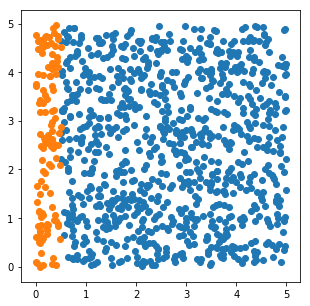

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(data[data[:,2] == 0,0], data[data[:,2] == 0,1])
plt.scatter(data[data[:,2] == 1,0], data[data[:,2] == 1,1], color='C1')
plt.show()

### Precision and Recall

In [5]:
def precision_recall_calculation(predict, expected):

    print("=== Precision ===")
    print("Correct: ", np.sum(expected == predict))
    print("All data: ", expected.shape[0])
    precision = np.sum(expected == predict) / expected.shape[0]
    print("Precision: ", precision)
    
    correct = expected == predict

    print("\n=== Recall ===")
    print("Correct: ", np.sum(correct[expected == 1]))
    print("All data: ", np.sum(expected == 1))
    recall = np.sum(correct[expected == 1]) / np.sum(expected == 1)
    print("Recall: ", recall)
    
    print ("\n=== F1 ===")
    print("F1: ", 2 * precision * recall / (precision + recall))
    
precision_recall_calculation(
    np.zeros(data.shape[0]),
    data[:,2]
)

=== Precision ===
Correct:  883
All data:  1000
Precision:  0.883

=== Recall ===
Correct:  0
All data:  117
Recall:  0.0

=== F1 ===
F1:  0.0


In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = np.asarray(train_test_split(data[:,0:2], data[:,2], test_size=0.3))

## Linear Regression Model
Try to train data with simple model

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(1, input_shape=(2,), kernel_initializer='uniform', activation='sigmoid'))
optimizer = Adam(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=optimizer)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(x_train, y_train, epochs=10, batch_size=2, verbose=1)

Epoch 1/10
700/700 [==============================] - 1s 932us/step - loss: 0.1371
Epoch 2/10
700/700 [==============================] - 1s 775us/step - loss: 0.0604
Epoch 3/10
700/700 [==============================] - 1s 739us/step - loss: 0.0408
Epoch 4/10
700/700 [==============================] - 1s 761us/step - loss: 0.0322
Epoch 5/10
700/700 [==============================] - 1s 742us/step - loss: 0.0330
Epoch 6/10
700/700 [==============================] - 1s 746us/step - loss: 0.0258
Epoch 7/10
700/700 [==============================] - 1s 764us/step - loss: 0.0250
Epoch 8/10
700/700 [==============================] - 1s 781us/step - loss: 0.0248
Epoch 9/10
700/700 [==============================] - 1s 744us/step - loss: 0.0299
Epoch 10/10
700/700 [==============================] - 1s 744us/step - loss: 0.0202


In [9]:
print(model.evaluate(x_test, y_test, batch_size=1))

300/300 [==============================] - 0s 1ms/step
0.0228536971137


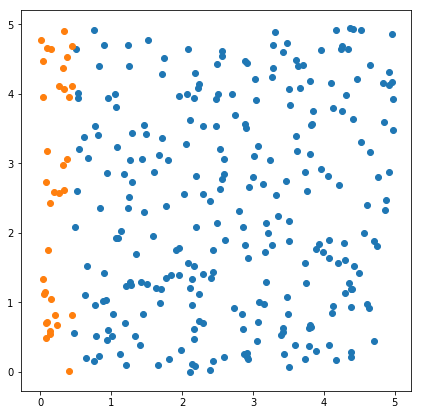

In [10]:
plt.figure(figsize=(7,7))
y_predict = model.predict(x_test).reshape(-1)
y_predict = y_predict < 0.5
plt.scatter(x_test[y_predict, 0], x_test[y_predict, 1])
plt.scatter(x_test[y_predict == False, 0], x_test[y_predict == False, 1], color='C1')
plt.show()

In [11]:
precision_recall_calculation(
    (model.predict(x_test) > 0.5).astype(np.float64).reshape(-1),
    y_test
)

=== Precision ===
Correct:  298
All data:  300
Precision:  0.993333333333

=== Recall ===
Correct:  35
All data:  37
Recall:  0.945945945946

=== F1 ===
F1:  0.969060670817
